In [89]:
import os
import PIL 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

       
def normalize(pcs):
    res = []
    for i in range(len(pcs)):
        res.append((pcs[i] - pcs[i].min()) / (pcs[i].max() - pcs[i].min()))
    return np.array(res) * 255








In [88]:
def part1(images):
    img_count = len(images)
    channels = [[],[],[]] # rgb

    for img in images:

        channels[0].append(img[:,:,0].flatten())
        channels[1].append(img[:,:,1].flatten())
        channels[2].append(img[:,:,2].flatten())

    r, g, b = np.array(channels[0]), np.array(channels[1]), np.array(channels[2])
    mean_r, mean_g, mean_b = np.mean(r, axis=0), np.mean(g, axis=0), np.mean(b, axis=0)
    r = r - mean_r
    g = g- mean_g
    b = b- mean_b


    r_cov, g_cov, b_cov = np.dot(r.T, r) / img_count, np.dot(g.T, g) / img_count, np.dot(b.T, b) / img_count
    eigvals_r, eigvecs_r = np.linalg.eig(r_cov)
    eigvals_g, eigvecs_g = np.linalg.eig(g_cov)
    eigvals_b, eigvecs_b = np.linalg.eig(b_cov)

    #transpose 
    eigvecs_r = eigvecs_r.T
    eigvecs_g = eigvecs_g.T
    eigvecs_b = eigvecs_b.T

    print("Top 10 PVEs")

    ar_red = []

    print("red channel")
    for i in range(10):
        pve = eigvals_r[i] / eigvals_r.sum()
        print(pve)

    print("green channel")
    for i in range(10):
        pve = eigvals_g[i] / eigvals_g.sum()
        print(pve)


    print("blue channel")
    for i in range(10):
        pve = eigvals_b[i] / eigvals_b.sum()
        print(pve)


    count_r, count_g, count_b = 0, 0, 0
    sum_r, sum_g, sum_b = 0, 0, 0

    while sum_r < 0.7:
        sum_r += eigvals_r[count_r] / eigvals_r.sum()
        count_r += 1

    while sum_g < 0.7:
        sum_g += eigvals_g[count_g] / eigvals_g.sum()
        count_g += 1

    while sum_b < 0.7:
        sum_b += eigvals_b[count_b] / eigvals_b.sum()
        count_b += 1

    print("Minimum number of principal components that are required to obtain at least 70% PVE")
    print("for red :", count_r)
    print("for green", count_g)
    print("for blue:", count_b)
    
    return eigvecs_r,eigvecs_g,eigvecs_b,mean_r,mean_g,mean_b 

In [87]:
def part2(eigvecs_r, eigvecs_g,eigvecs_b):
    pcs = {
        'r': normalize(eigvecs_r[0:10,:].reshape(10, 64, 64)),
        'g': normalize(eigvecs_g[0:10,:].reshape(10, 64, 64)),
        'b': normalize(eigvecs_b[0:10,:].reshape(10, 64, 64))
    }


    fig = plt.figure(figsize=(10, 8))
    col = 5
    row = 3
    x = 1

    for i in range(10):
        img = np.zeros((64,64,3))
        for j, channel in enumerate(pcs):
            img[:,:,j] = pcs[channel][i]

            fig.add_subplot(row, col, i+1)
            plt.imshow(img.astype(np.uint8))
            plt.title("Component " + str(i +1))
            mng = plt.get_current_fig_manager()
            mng.set_window_title("First 10 PC's")

    plt.show()

In [86]:
def part3(direct, eigvecs_r,eigvecs_g,eigvecs_b,mean_r,mean_g,mean_b):
    img =np.array(Image.open(direct).resize((64,64), Image.Resampling.BILINEAR)) # change this path if needed

    ks = [1, 50, 250, 500, 1000, 4096]

    mean_r =  mean_r.reshape(64, 64)
    mean_g =  mean_g.reshape(64, 64)
    mean_b =  mean_b.reshape(64, 64)

    for k in ks:

        rt, copy = np.zeros((64,64,3)), np.copy(img)

        copy[:,:,0] = copy[:,:,0] - mean_r
        copy[:,:,1] = copy[:,:,1] - mean_g
        copy[:,:,2] = copy[:,:,2] - mean_b

        fig = plt.figure(figsize=(10, 8))
        col = 5
        row = 3
        n = 0

        flat = []
        for i in range(3):
            flat.append(copy[:,:,i].flatten())
        flat_np = np.array(flat)



        for i in range(k):
            rt[:,:,0] += (np.dot(flat_np[0], eigvecs_r[i]) * eigvecs_r[i]).reshape(64, 64)
            rt[:,:,1] += (np.dot(flat_np[1], eigvecs_g[i]) * eigvecs_g[i]).reshape(64, 64)
            rt[:,:,2] += (np.dot(flat_np[2], eigvecs_b[i]) * eigvecs_b[i]).reshape(64, 64)


        rt[:,:,0] = rt[:,:,0] + mean_r
        rt[:,:,1] = rt[:,:,1] + mean_g
        rt[:,:,2] = rt[:,:,2] + mean_b

        fig.add_subplot(row, col, n+1)
        n += 1
        plt.imshow(rt.astype(np.uint8))
        plt.title(str(i +1) + " Principal Components")
        mng = plt.get_current_fig_manager()
        mng.set_window_title("First 10 PC's")
        plt.show()


Top 10 PVEs
red channel
0.2350696993627989
0.15651115206738625
0.0900525385704431
0.06829954682854637
0.03752733951106832
0.023947539134905268
0.02276465878006266
0.021128209465633457
0.017935920584406462
0.01349360904861361
green channel
0.20873714854025469
0.15884565962402103
0.09258856862586821
0.06811111746109595
0.03798505275724365
0.024467317448625018
0.024279163413091262
0.02149052826450394
0.018870002898966124
0.014211335203650739
blue channel
0.22859035906545555
0.1564925792534415
0.08790595575693254
0.06203548174652184
0.03740134203265636
0.024165873862426416
0.0240473339720092
0.020596134585636215
0.018458994366195053
0.014285720074286438
Minimum number of principal components that are required to obtain at least 70% PVE
for red : 12
for green 13
for blue: 13


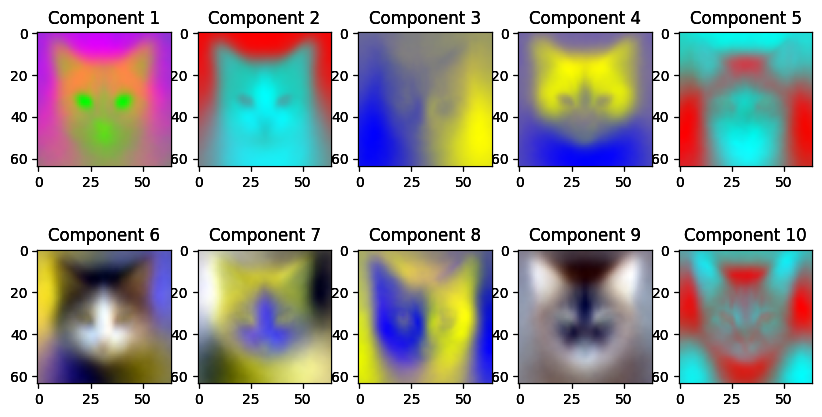

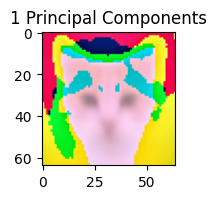

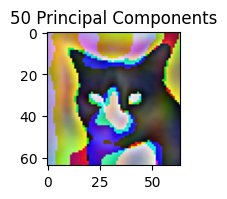

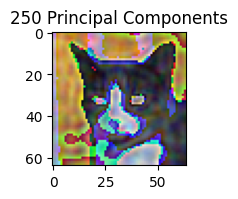

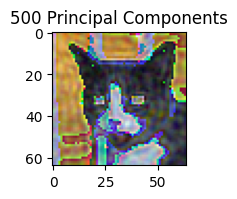

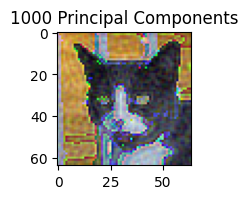

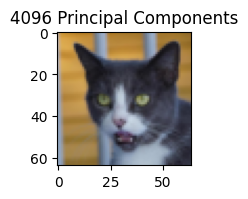

In [90]:
def main():
    
    images = []    
    #change this path if needed
    folder_dir = "C:\\Users\\virem\\ml_hw22\\"
    cat_img = "C:\\Users\\virem\\ml_hw22\\flickr_cat_000003.jpg"
    for i in os.listdir(folder_dir):
         if i.endswith(".jpg"):
            img = PIL.Image.open(folder_dir+i).resize((64,64), Image.BILINEAR)
            images.append(np.array(img))
    
    eigvecs_r,eigvecs_g,eigvecs_b,mean_r,mean_g,mean_b = part1(images)
    part2(eigvecs_r,eigvecs_g,eigvecs_b)
    part3(cat_img, eigvecs_r,eigvecs_g,eigvecs_b,mean_r,mean_g,mean_b)
    
main()